# Time Independent Schrödinger Equation

## Development

### The Time-Independent Schrödinger Equation

In position-space, Schrödinger's Equation reads:

$\textstyle i\hbar \frac{\partial\Psi}{\partial t} = \frac{-\hbar^2}{2m}\frac{\partial^2\Psi}{\partial x^2}+V\cdot\Psi$

If the potential is independent of time, it is possible to solve the equation by separation of variables. For this, we propose a solution of the form:

$\textstyle \Psi(x,t)=\phi(x)\cdot\chi(t)$

so that the equation becomes:

$\textstyle i\hbar\cdot\phi(x)\frac{\partial\chi(t)}{\partial t} = \frac{-\hbar^2}{2m}\chi(t)\frac{\partial^2\phi(x)}{\partial x^2}+V(x)\cdot\phi(x)\chi(t)$

Dividing through by $\Psi$

$\textstyle \frac{i\hbar}{\chi(t)} \frac{\partial\chi(t)}{\partial t} = \frac{-\hbar^2}{2m}\frac{1}{\phi(x)}\frac{\partial^2\phi(x)}{\partial x^2}+V(x)$

Since both sides of this equation depend only on one variable, they must both equual a constant. Denoting said constant by $E$ we get:

$\textstyle {i\hbar} \frac{\partial\chi(t)}{\partial t} = E\cdot{\chi(t)}$

$\textstyle \frac{-\hbar^2}{2m}\frac{\partial^2\phi(x)}{\partial x^2}+V(x)\cdot\phi(x) = E\cdot\phi(x)$

The second of these is the time-independent Schrödinger Equation, which can alternatively be written in *bracket* notation as

$\displaystyle \hat{H}\left|\phi\right> = E\left|\phi\right>$

**We are going to solve this equation for a particle bounded to a finite region in space.**

___

### Finite Difference Method



## Code

### Setup

**Importing Libraries**

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

**Physical Constants**

In [50]:
hbar = 1
m = 1

**Problem Parameters**

In [51]:
a = -10
b = 10
N = 101

xs = np.linspace(a,b,N)
dx = xs[1]-xs[0]

**Potential**

In [52]:
def potential(x):
    if (a+1*dx) < x < (b-1*dx):
        return 0
    else:
        return 1e20

### Finite Difference Method

**Kinetic Energy**

In [53]:
T = np.zeros(N**2).reshape(N,N)

for i,row in enumerate(T):
    for j,col in enumerate(row):
        if any(z in [0,N-1] for z in [i,j]):
            T[i,j] = 0
        elif i==j:
            T[i,j] = -2
        elif abs(i-j) == 1:
            T[i,j] = 1
        else:
            T[i,j] = 0

T = -T*(hbar**2/(2*dx**2))

**Potential Energy**

In [54]:
V = np.zeros(N**2).reshape(N,N)

for i,row in enumerate(V):
    for j,col in enumerate(row):
        if i==j:
            V[i,j] = potential(xs[i])
        else:
            V[i,j] = 0

**Hamiltonian**

In [55]:
H = T + V

**Eigenvalue Equation**

In [56]:
val,vec = np.linalg.eig(H)
vec = vec[:,val != 0]
val = val[val != 0]
z = np.argsort(val)
z = z[:4]

In [57]:
energies = np.round(val[z]/val[z][0])
print(energies)


[ 1.  4.  9. 16.]


In [58]:
for i in range(len(z)):
    v = vec[:,z[i]]
    v = v/np.sqrt(np.sum(v*v))
    vec[:,z[i]] = v

### Plot

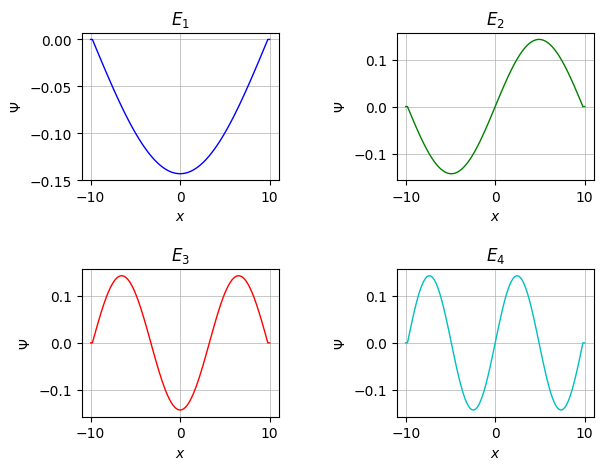

In [59]:
fig, ax = plt.subplots(nrows=2, ncols=2,)
colors = ['b','g','r','c']

for i,row in enumerate(ax):
    for j,col in enumerate(row):
        n = 2*i +j
        col.plot(xs,vec[:,z[n]], lw=1, color=colors[n], label="{} ".format(i))
        col.grid(lw=0.5)
        col.set_title('$E_{}$'.format(n+1))
        col.set_xlabel('$x$')
        col.set_ylabel('$\Psi$')
        # col.set_xlim([-11, 11])
        # col.set_ylim([-0.1, 0.1])

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9,top=0.9, wspace=0.6, hspace=0.6)

### Exporting Results

In [60]:
ti_wf = {'xs' : xs,
                    0:vec[:,z[0]],
                    1:vec[:,z[1]],
                    2:vec[:,z[2]],
                    3:vec[:,z[n]]}

np.save("ti_wf.npy",ti_wf,allow_pickle=True)